# Deep Learning Handwriting Recognition: Developing the Model

## Introduction

The pre-trained model, `model.h5`, inside this web app is responsible for predicting handwriting. 

This Jupyter Notebook discusses how the `model.h5` file was created.

## Guidelines

In order to create a model to predict handwriting, we will need to go through the following guidelines:

### Creating the Training and Testing Dataset
1. Acquire the outside dataset (with the necessary preparations)
2. Create the training and test dataset
    * Along with the complementing "answer key"
3. Prepare these datasets for the ML algorithm

### Creating The Model
4. Generate multiple permutations of models to find which parameters work the best 
    * I have chosen these permutations to be: 1) number of dense layers, 2) number of neurons of each layer, 3) number of convolutional layers
    * `dropout` should also be considered to prevent overfitting
5. Tweak any parameters if need be
6. Choose a model to go inside of our web app

## Creating the Training and Testing Dataset

### 1. Acquire the outside dataset

We will begin by initializing all of our imports, along with the chosen dataset. The dataset chosen comes from [EMNIST](https://www.kaggle.com/crawford/emnist) on Kaggle.

I have downloaded this dataset into the directory found inside the `DATADIR` variable. If you wish to run this python code locally, change the directory to the location of your downloaded EMNIST.

In [12]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import utils
# import sklearn.metrics as metrics

DATADIR = "/Users/michaelmccabe/Desktop/Applications/Datasets/emnist" # The location of my Kaggle EMNIST dataset

A dataframe called `train` is created to hold the `'emnist-balanced-train.csv'` file.

This CSV file has no headers. We do not want the first image data to be the "header", we want the first row to be part of the data: `header=None`

In [13]:
train = pd.read_csv(os.path.join(DATADIR, 'emnist-balanced-train.csv'), header=None)

Let's take a look at this `train` dataframe

In [14]:
train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


A dataframe called `test` is created to hold the `emnist-balanced-test.csv` file.

We will perform the same operations.

In [15]:
test = pd.read_csv(os.path.join(DATADIR, 'emnist-balanced-test.csv'), header=None)

In [16]:
test.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


A dataframe called `mapp` is created to hold the `emnist-balanced-mapping.txt` file. This mapping file is structured where the first column is simply the index, and the 2nd column is the character code.

Examples: char `48` is `0`, char `65` is `A`, chr `116` is `t`

`mapp` Dataframe Parameters:
* The txt file is seperated by spaces: `delimiter = ' '`
* The txt file has no headers: `header=None`
* We do not need the 1st column of data, we want the 2nd column as the only column in our `mapp` dataframe: `usecols=[1]`
* Because the data is only one column, we can use `squeeze=True` to return a series and use array methods on it


In [17]:
mapp = pd.read_csv("/Users/michaelmccabe/Desktop/Applications/Datasets/emnist/emnist-balanced-mapping.txt"
                       , delimiter = ' ', header=None, usecols=[1], squeeze=True)
mapp.head(12)

0     48
1     49
2     50
3     51
4     52
5     53
6     54
7     55
8     56
9     57
10    65
11    66
Name: 1, dtype: int64

In [18]:
# testing out the charcodes
print("char code of index 46 is", mapp[46])
print(chr(mapp[46]))

char code of index 46 is 116
t


The variable `class_mapping` is created to map indices with the actual character associated with it

In [19]:
class_mapping = []

for num in range(len(mapp)):
    class_mapping.append(chr(mapp[num]))

Let's make sure our class_mapping works

In [20]:
class_mapping[45]

'r'

Let's see the shape of all of the data, to see what we are working with

In [21]:
print(train.shape, test.shape, mapp.shape)

(112800, 785) (18800, 785) (47,)


Create a variable, `class_num`, to store the number of classifications our model will predict. This will be the number of output layer neurons for the model.

In [22]:
class_num = len(class_mapping)
class_num

47

### 2. Create the training and test dataset

Now that our `train`, `test`, and `map` variables are all set up, let's check out the images inside before we create the datasets.

### Test a singular image

How an image from the EMNIST dataset will be displayed:
1. An arbitrary image from the `train` dataset is chosen: image number `8`
    * This arbitrary image number is stored inside `test_row_num`
2. The character associated with every image is found in the first column (the class)
3. The pixel data is located in the remaining colums (784 columns for a 28x28 image)
    * The pixel data is stored inside `test_row_num_img`
4. The data must be reshaped into a `28x28` image (per EMNIST)
    * Shape before: `(784,)`
    * Shape after: `(28,28)`

In [23]:
test_row_num = 8
test_row_num_img = train.values[test_row_num, 1:]
HEIGHT = 28
WIDTH = 28

reshape_img = test_row_num_img.reshape(HEIGHT,WIDTH)

### Take a look at the singular image

Plot the image using `matplotlib` and see how it all looks.

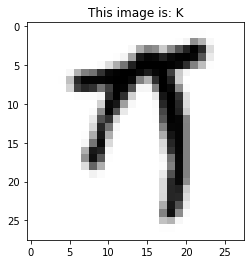

In [24]:
test_char = class_mapping[train.values[test_row_num,0]]

plt.imshow(reshape_img, cmap=plt.cm.binary)
plt.title("This image is: {}".format(test_char))
plt.show()

### Result

Everything is correct, but the image is flipped!

### Flip the image into its correct position

Transpose the image using `numpy`
 * Provide `np.transpose` the image, `reshape_img`, and `axes=[1,0]` to rotate the image clockwise by 90 degrees

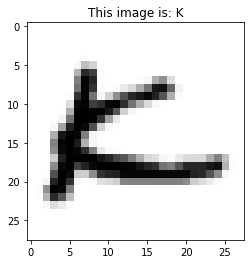

In [25]:
img_flip = np.transpose(reshape_img, axes=[1,0])
plt.imshow(img_flip, cmap=plt.cm.binary)
plt.title("This image is: {}".format(test_char))
plt.show()

### Result

The data is structures appropriately. We will perform these operations on every single image.

## Creating the dataset

Operations needed for each training and testing image:

1. Reshape the data into (28,28) shapes

2. Rotate the data 90 degrees clockwise

### Functions to Asssist Us

1. A function that will convert the data into proper images for our dataset, `convert_training_data`

2. A function that will give us the correct image character, `get_char`


In [26]:
def convert_training_data(df,row):
    pxl_data = df.values[row,1:]
    # Reshape the image coming in
    pxl_reshape = pxl_data.reshape(HEIGHT,WIDTH)
    # Rotate the image
    final_img = np.transpose(pxl_reshape, axes=[1,0])
    return final_img

def get_char(df, row):
    return class_mapping[df.values[row,0]]

### Test the Functions

Make sure that these functions work

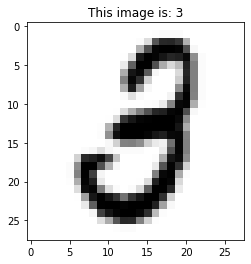

In [27]:
# Test out the function

test_row = 32

test_row_img_data = convert_training_data(train, test_row)
test_char = get_char(train, test_row)

plt.imshow(test_row_img_data, cmap=plt.cm.binary)
plt.title("This image is: {}".format(test_char))
plt.show()

## Build the Datasets to Create Our Model

Every image inside the `train` and `test` is converted into a correctly-oriented `(28,28)` shape and stored inside its respective array variable. When complete, pixel data is normalized (scaled) so that pixel values range from 0 to 1 instead of 0 to 255. This normalization helps make it easier for the neural network to learn.

In [28]:
# Iterate through "train" and build our dataset

train_x = []
test_x = []

for i in range(len(train)):
    train_x.append(convert_training_data(train,i))

for i in range(len(test)):
    test_x.append(convert_training_data(test,i))

train_x = np.asarray(train_x)
test_x = np.asarray(test_x)

# normalize the data

train_x = train_x.astype('float32')
train_x /= 255
test_x = test_x.astype('float32')
test_x /= 255

Let's check the shape of these arrays

In [29]:
print(train_x.shape, test_x.shape)

(112800, 28, 28) (18800, 28, 28)


## Create the "answers" to the train and test data

The arrays `train_y` and `test_y` will hold the answers to `train_x` and `test_x` respectively. The "answers" or "classes" to this data is found in the 1st column of the `train` and `test` dataframes.

Take note that `train_y` and `test_y` do not have a 2nd dimension in its tuple - we will address this later.

In [30]:
train_y = train.iloc[:,0]
test_y = test.iloc[:,0]

In [31]:
print("train_y: ", train_y.shape)
print("test_y: ", test_y.shape)

train_y:  (112800,)
test_y:  (18800,)


## Plot a few Train and Test images and their answers

Make sure that the images have correct solutions attached to them.

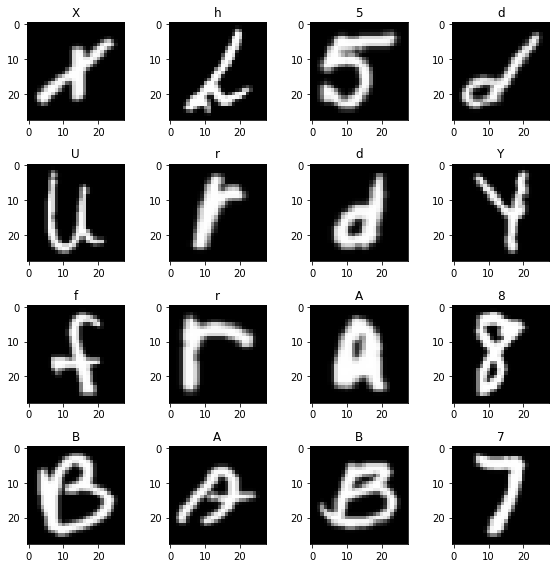

In [32]:
# Plot 4 columns and 4 rows for a subplot
plt_cols = 4
plt_rows = 4

# Start at image #100 of our train_x dataset
row_to_start = 100

# Create a figure, where each figure has a size (8,8)
fig=plt.figure(figsize=(8, 8))

# iterate between row_to_start to the amount of rows and cols we have created
for i in range(row_to_start, row_to_start + plt_cols*plt_rows):
    # each plot will initate the same rows and cols, for the 3rd param we will iterate from 1 to (rows * cols)
    fig.add_subplot(plt_rows, plt_cols, i - row_to_start + 1)
    fig.tight_layout()
    #image to show is the x_train
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
    plt.title(class_mapping[train_y[i]])
plt.show()

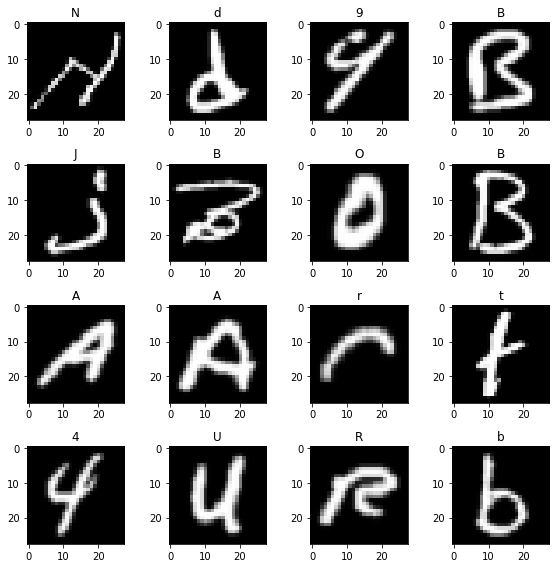

In [33]:
# Plot 4 columns and 4 rows for a subplot
plt_cols = 4
plt_rows = 4

# Start at image #100 of our train_x dataset
row_to_start = 100

# Create a figure, where each figure has a size (8,8)
fig=plt.figure(figsize=(8, 8))

# iterate between row_to_start to the amount of rows and cols we have created
for i in range(row_to_start, row_to_start + plt_cols*plt_rows):
    # each plot will initate the same rows and cols, for the 3rd param we will iterate from 1 to (rows * cols)
    fig.add_subplot(plt_rows, plt_cols, i - row_to_start + 1)
    fig.tight_layout()
    #image to show is the x_train
    plt.imshow(test_x[i], cmap=plt.get_cmap('gray'))
    plt.title(class_mapping[test_y[i]])
plt.show()

### Result

Both `train_x` and `train_y`, as well as `test_x` and `test_y`, are appropriately matched.

## 3. Prepare these datasets for the ML algorithm

We will provide [One Hot Encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) to the ML algorithm so that the neural network does a better job in prediction. The shape of the `train_y` and `test_y` become `(112800, 47)`.

In [34]:
train_y = utils.to_categorical(train_y, class_num)
test_y = utils.to_categorical(test_y, class_num)
print("train_y: ", train_y.shape)
print("test_y: ", test_y.shape)

train_y:  (112800, 47)
test_y:  (18800, 47)


The neural network expects 4 dimensions for `train_x` and `test_x`. We will also reshape these arrays accordingly

In [35]:
train_x = train_x.reshape(-1, HEIGHT, WIDTH, 1)
test_x = test_x.reshape(-1, HEIGHT, WIDTH, 1)

In [36]:
train_x.shape

(112800, 28, 28, 1)

## Save your data

If you wish to perform the above locally, it is highly recommended that at this point you save your data, so that you don't have to "get the data" every single time.

`import pickle`

Load the data into pickle

```
pickle_out = open("train_x.pickle", "wb")
pickle.dump(train_x, pickle_out)
pickle_out.close()

pickle_out = open("test_x.pickle", "wb")
pickle.dump(test_x, pickle_out)
pickle_out.close()

pickle_out = open("train_y.pickle", "wb")
pickle.dump(train_y, pickle_out)
pickle_out.close()

pickle_out = open("test_y.pickle", "wb")
pickle.dump(test_y, pickle_out)
pickle_out.close()
```



## Creating The Model

The data is now successfully "wrangled" and ready to be used for the ML model.

At this point, we will not be running any code inside this Jupyter Notebook. It is more appropriate to perform the following operations inside an IDE.

## 4. Generate multiple permutations of models

Models

tensorboard --logdir='logs/' 

In [37]:
# Load TENSORBOARD
%load_ext tensorboard

# Reload TENSORBOARD
# %reload_ext tensorboard

logdir = "logs/"
# Start TENSORBOARD
%tensorboard --logdir logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 664), started 1:33:09 ago. (Use '!kill 664' to kill it.)

## Pictures

Pictures from tensorboard - all graphs

In [38]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "tensorboard-images/first-run-acc.png")

In [39]:
Image(url= "tensorboard-images/first-run-loss.png")

## FIRST RUN - GOOD GRAPHS

In [40]:
Image(url= "tensorboard-images/first-run-good-acc.png")

In [41]:
Image(url= "tensorboard-images/first-run-good-loss.png")

## FIRST RUN - BAD GRAPHS

In [47]:
Image(url= "tensorboard-images/first-run-bad-acc.png")

In [43]:
Image(url= "tensorboard-images/first-run-bad-loss.png")

## Result

2 Conv is clearly victorious

1 and 3 conv are not as much

Number of dense layers and nodes do not seem to play much of a role

## Second run - testing out dropout

We will now test out dropout

In [48]:
Image(url= "tensorboard-images/second-run-acc.png")

In [49]:
Image(url= "tensorboard-images/second-run-loss.png")

## Result

The top 4 highest accuracies and lowest losses are dropout 

We can say that dropout is the winner

## Third run - trying 256 nodes

We will now test 256 nodes with dropout

In [53]:
Image(url= "tensorboard-images/third-run-acc.png")

In [51]:
Image(url= "tensorboard-images/third-run-loss.png")

## Result

It does not seem like there was much of a difference between 256 nodes and 128 nodes

## What model to pick

I am more in favor of "loss" than "accuracy"

So the model I will go with: 2 conv layers, 1 dense layer, 256 nodes per layer with a 0.2 droput